KEY METRICS CALCULATION

RETENTION AND COHORT ANALYSIS

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
# Load all four CSV files
df1 = pd.read_csv('C:/Users/sjn17/Downloads/mobile_app_analytics/data/sub_data/retention_1results.csv')
df2 = pd.read_csv('C:/Users/sjn17/Downloads/mobile_app_analytics/data/sub_data/retention_2results.csv')
df3 = pd.read_csv('C:/Users/sjn17/Downloads/mobile_app_analytics/data/sub_data/retention_3results.csv')
df4 = pd.read_csv('C:/Users/sjn17/Downloads/mobile_app_analytics/data/sub_data/retention_4results.csv')
# Examine structure of each file
print(df1.head())
print(df1.columns)
print(df1.info())
print(df2.head())
print(df2.columns)
print(df2.info())
print(df3.head())
print(df3.columns)
print(df3.info())
print(df4.head())
print(df4.columns)
print(df4.info())

   first_date  total_users  retained_users  weekly_retention_rate
0  2025-07-03        55860            6666                  11.93
1  2025-07-04        26651            3236                  12.14
2  2025-07-05        19460            2420                  12.44
3  2025-07-06        11100            1379                  12.42
4  2025-07-07         4639             596                  12.85
Index(['first_date', 'total_users', 'retained_users', 'weekly_retention_rate'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   first_date             61 non-null     object 
 1   total_users            61 non-null     int64  
 2   retained_users         61 non-null     int64  
 3   weekly_retention_rate  61 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.0+ KB
None
   first_date  total_users 

In [23]:
def add_prefix(df, name):
    return df.add_prefix(f"{name}_").rename(columns={f"{name}_first_date": "first_date"})

df1_ = add_prefix(df1, "df1")
df2_ = add_prefix(df2, "df2")
df3_ = add_prefix(df3, "df3")
df4_ = add_prefix(df4, "df4")

dfs = [df1_, df2_, df3_, df4]

from functools import reduce
merged_df = reduce(lambda left, right: pd.merge(left, right, on="first_date", how="outer"), dfs)

print(merged_df.head())


   first_date  df1_total_users  df1_retained_users  df1_weekly_retention_rate  \
0  2025-07-03            55860                6666                      11.93   
1  2025-07-04            26651                3236                      12.14   
2  2025-07-05            19460                2420                      12.44   
3  2025-07-06            11100                1379                      12.42   
4  2025-07-07             4639                 596                      12.85   

   df2_total_users  df2_retained_users  df2_month1st_retention_rate  \
0            55860               27967                        50.07   
1            26651               13497                        50.64   
2            19460                9967                        51.22   
3            11100                5597                        50.42   
4             4639                2384                        51.39   

   df3_total_users  df3_retained_users  df3_month2nd_retention_rate  \
0            55

In [24]:
import pandas as pd
from functools import reduce
merged_df = merged_df.drop(columns=["df1_total_users", "df2_total_users", "df3_total_users"])
merged_df




,first_date,df1_retained_users,df1_weekly_retention_rate,df2_retained_users,df2_month1st_retention_rate,df3_retained_users,df3_month2nd_retention_rate,total_users,retained_users,retention_rate
0,2025-07-03,6666,11.93,27967,50.07,25704,46.02,55860,53671,96.08
1,2025-07-04,3236,12.14,13497,50.64,11855,44.48,26651,25352,95.13
2,2025-07-05,2420,12.44,9967,51.22,8370,43.01,19460,18337,94.23
3,2025-07-06,1379,12.42,5597,50.42,4724,42.56,11100,10321,92.98
4,2025-07-07,596,12.85,2384,51.39,1858,40.05,4639,4242,91.44
...,...,...,...,...,...,...,...,...,...,...
56,2025-08-28,0,0.00,0,0.00,0,0.00,8,0,0.00
57,2025-08-29,0,0.00,0,0.00,0,0.00,8,0,0.00
58,2025-08-30,0,0.00,0,0.00,0,0.00,10,0,0.00
59,2025-08-31,0,0.00,0,0.00,0,0.00,16,0,0.00


In [25]:
cols = list(merged_df.columns)

# remove total_users from its current position
cols.remove("total_users")

# insert total_users right after first_date
cols.insert(cols.index("first_date") + 1, "total_users")

# reorder dataframe
merged_df = merged_df[cols]

merged_df.head()


,first_date,total_users,df1_retained_users,df1_weekly_retention_rate,df2_retained_users,df2_month1st_retention_rate,df3_retained_users,df3_month2nd_retention_rate,retained_users,retention_rate
0,2025-07-03,55860,6666,11.93,27967,50.07,25704,46.02,53671,96.08
1,2025-07-04,26651,3236,12.14,13497,50.64,11855,44.48,25352,95.13
2,2025-07-05,19460,2420,12.44,9967,51.22,8370,43.01,18337,94.23
3,2025-07-06,11100,1379,12.42,5597,50.42,4724,42.56,10321,92.98
4,2025-07-07,4639,596,12.85,2384,51.39,1858,40.05,4242,91.44


In [26]:
import pandas as pd
merged_df.to_csv("advanced_retention.csv", index=False)

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

df = pd.read_csv('C:/Users/sjn17/Downloads/mobile_app_analytics/data/cohort_results.csv')
df

,cohort_date,total_users,d1_retention,week1_retention,month1_retention,rest_retention
0,2025-07-03,2189,41.30,87.53,98.45,98.36
1,2025-07-04,1299,44.34,81.76,96.92,97.07
2,2025-07-05,1123,36.33,77.20,97.15,97.86
3,2025-07-06,779,22.72,74.33,95.25,94.87
4,2025-07-07,397,19.65,64.74,90.68,92.70
...,...,...,...,...,...,...
56,2025-08-28,8,0.00,0.00,0.00,0.00
57,2025-08-29,8,0.00,0.00,0.00,0.00
58,2025-08-30,10,0.00,0.00,0.00,0.00
59,2025-08-31,16,0.00,0.00,0.00,0.00


CHURN IDENTIFICATION

In [43]:
import pandas as pd
merged_df['churn_rate'] = ((merged_df['total_users'] - merged_df['retained_users']) / merged_df['total_users']) * 100
df = pd.read_csv('C:/Users/sjn17/Downloads/mobile_app_analytics/data/advanced_retention.csv')
merged_df.to_csv("advanced_retention.csv", index=False)
merged_df


C:\Users\sjn17\AppData\Local\Temp\ipykernel_10020\618368282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['churn_rate'] = ((merged_df['total_users'] - merged_df['retained_users']) / merged_df['total_users']) * 100


,first_date,total_users,df1_retained_users,df1_weekly_retention_rate,df2_retained_users,df2_month1st_retention_rate,df3_retained_users,df3_month2nd_retention_rate,retained_users,retention_rate,churn_rate,churn_rate_smooth
0,2025-07-03,55860,6666,11.93,27967,50.07,25704,46.02,53671,96.08,3.918725,NaN
1,2025-07-04,26651,3236,12.14,13497,50.64,11855,44.48,25352,95.13,4.874114,NaN
2,2025-07-05,19460,2420,12.44,9967,51.22,8370,43.01,18337,94.23,5.770812,NaN
3,2025-07-06,11100,1379,12.42,5597,50.42,4724,42.56,10321,92.98,7.018018,NaN
4,2025-07-07,4639,596,12.85,2384,51.39,1858,40.05,4242,91.44,8.557879,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
56,2025-08-28,8,0,0.00,0,0.00,0,0.00,0,0.00,100.000000,87.771593
57,2025-08-29,8,0,0.00,0,0.00,0,0.00,0,0.00,100.000000,89.812410
58,2025-08-30,10,0,0.00,0,0.00,0,0.00,0,0.00,100.000000,91.111111
59,2025-08-31,16,0,0.00,0,0.00,0,0.00,0,0.00,100.000000,94.285714


In [44]:
merged_df

,first_date,total_users,df1_retained_users,df1_weekly_retention_rate,df2_retained_users,df2_month1st_retention_rate,df3_retained_users,df3_month2nd_retention_rate,retained_users,retention_rate,churn_rate,churn_rate_smooth
0,2025-07-03,55860,6666,11.93,27967,50.07,25704,46.02,53671,96.08,3.918725,NaN
1,2025-07-04,26651,3236,12.14,13497,50.64,11855,44.48,25352,95.13,4.874114,NaN
2,2025-07-05,19460,2420,12.44,9967,51.22,8370,43.01,18337,94.23,5.770812,NaN
3,2025-07-06,11100,1379,12.42,5597,50.42,4724,42.56,10321,92.98,7.018018,NaN
4,2025-07-07,4639,596,12.85,2384,51.39,1858,40.05,4242,91.44,8.557879,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
56,2025-08-28,8,0,0.00,0,0.00,0,0.00,0,0.00,100.000000,87.771593
57,2025-08-29,8,0,0.00,0,0.00,0,0.00,0,0.00,100.000000,89.812410
58,2025-08-30,10,0,0.00,0,0.00,0,0.00,0,0.00,100.000000,91.111111
59,2025-08-31,16,0,0.00,0,0.00,0,0.00,0,0.00,100.000000,94.285714


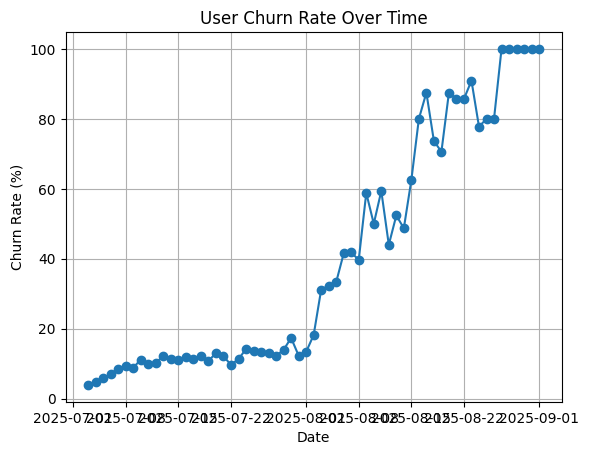

In [45]:
#user churn rate over time
import matplotlib.pyplot as plt

plt.plot(merged_df['first_date'], merged_df['churn_rate'], marker='o')
plt.title('User Churn Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Churn Rate (%)')
plt.grid(True)
plt.show()


7-day churn rate

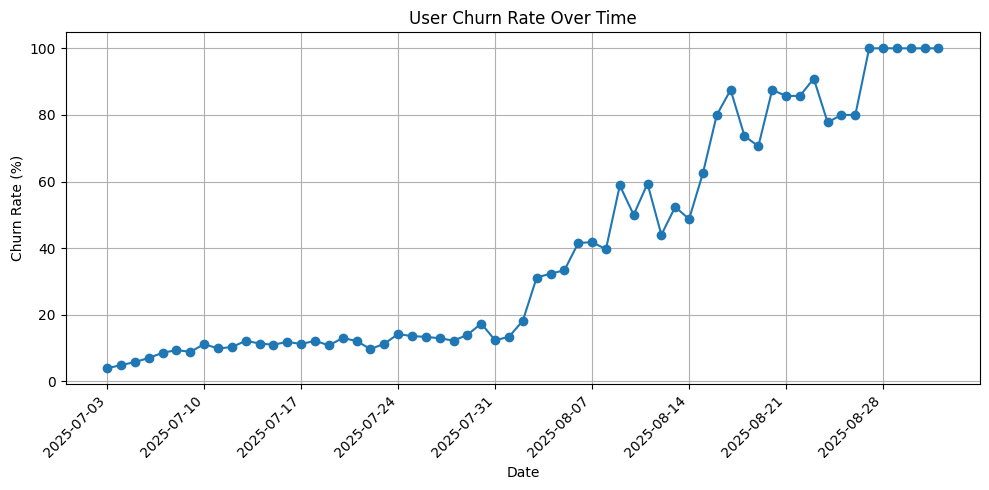

In [46]:
#user churn rate over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(merged_df['first_date'], merged_df['churn_rate'], marker='o')
plt.title('User Churn Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Churn Rate (%)')
plt.grid(True)

# Show every 7th label and rotate
plt.xticks(merged_df['first_date'][::7], rotation=45, ha='right')

plt.tight_layout()
plt.show()


rolling average for smoother view

C:\Users\sjn17\AppData\Local\Temp\ipykernel_10020\918101215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['churn_rate_smooth'] = merged_df['churn_rate'].rolling(window=7).mean()


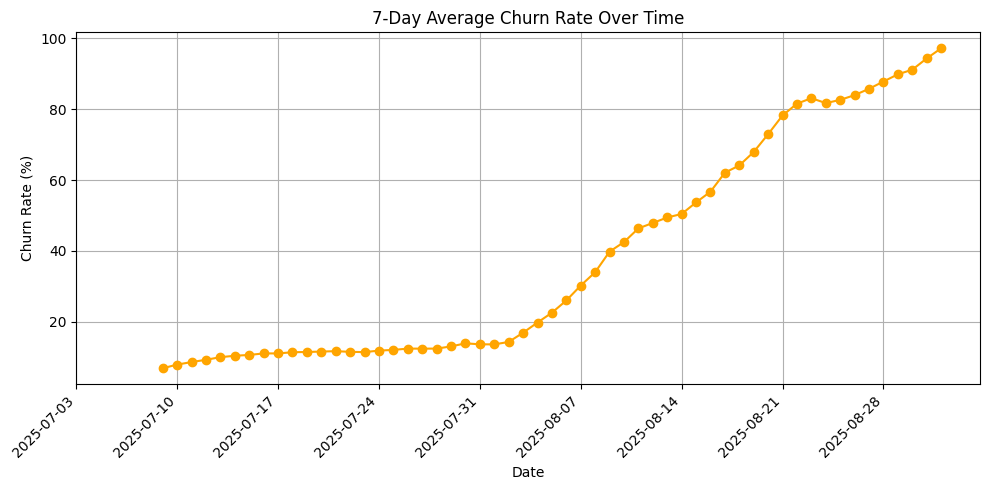

In [47]:
merged_df['churn_rate_smooth'] = merged_df['churn_rate'].rolling(window=7).mean()

plt.figure(figsize=(10,5))
plt.plot(merged_df['first_date'], merged_df['churn_rate_smooth'], marker='o', color='orange')
plt.title('7-Day Average Churn Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Churn Rate (%)')
plt.grid(True)
plt.xticks(merged_df['first_date'][::7], rotation=45, ha='right')
plt.tight_layout()
plt.show()


STATISTICAL ANALYSIS

C:\Users\sjn17\AppData\Local\Temp\ipykernel_10020\1192675214.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['first_date'] = pd.to_datetime(merged_df['first_date'])


Slope: 1.78
R-squared: 0.871
P-value: 0.0000
There is a statistically significant trend in churn rate over time.


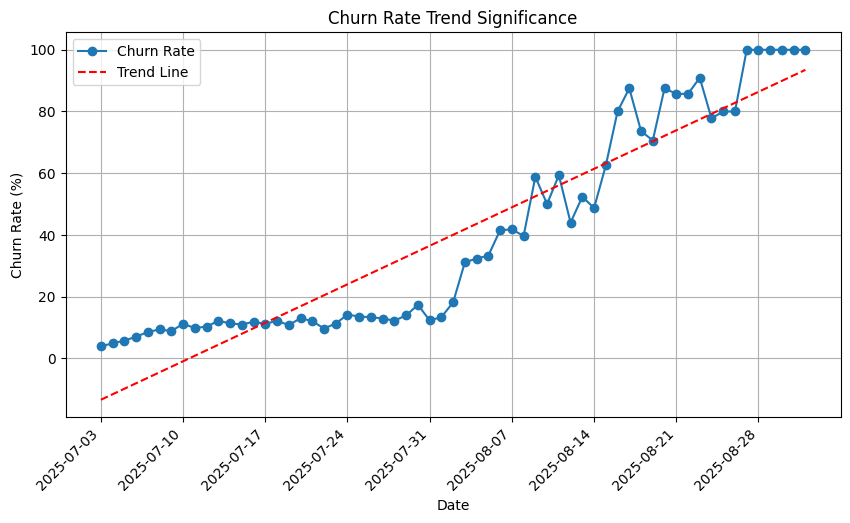

In [48]:
#churn rate trend significance
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

# date is in datetime
merged_df['first_date'] = pd.to_datetime(merged_df['first_date'])

# Linear regression on churn rate over time
slope, intercept, r_value, p_value, std_err = linregress(range(len(df)), merged_df['churn_rate'])

print(f"Slope: {slope:.2f}")
print(f"R-squared: {r_value**2:.3f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("There is a statistically significant trend in churn rate over time.")
else:
    print("No statistically significant trend detected.")

plt.figure(figsize=(10,5))
plt.plot(merged_df['first_date'], merged_df['churn_rate'], label='Churn Rate', marker='o')
plt.plot(merged_df['first_date'], intercept + slope * range(len(df)), 'r--', label='Trend Line')
plt.title('Churn Rate Trend Significance')
plt.xlabel('Date')
plt.ylabel('Churn Rate (%)')
plt.xticks(merged_df['first_date'][::7], rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.show()


Correlation Analysis

                total_users  retention_rate  churn_rate
total_users        1.000000        0.294488   -0.294486
retention_rate     0.294488        1.000000   -1.000000
churn_rate        -0.294486       -1.000000    1.000000


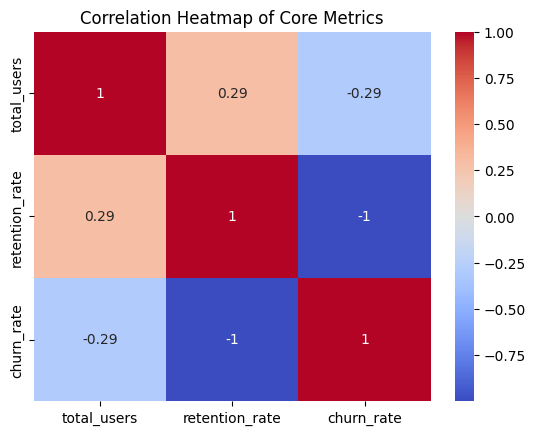

In [49]:
#correlation analysis
#Checking relationships between metrics (total_users, retention_rate, churn_rate)
corr = merged_df[['total_users', 'retention_rate', 'churn_rate']].corr()
print(corr)

import seaborn as sns
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Core Metrics')
plt.show()


DELIVERABLE

Key Insights (Statistical Analysis)

Churn Trend Over Time
= The churn rate shows a statistically significant upward trend over time (slope = 1.78, R² = 0.871, p < 0.001), indicating that more users are leaving the app as time progresses.

Retention vs Churn
= There is a perfect negative correlation between retention_rate and churn_rate (-1.0), which confirms that as retention decreases, churn increases.

Total Users and Engagement
=total_users has a weak correlation with both retention_rate (0.29) and churn_rate (-0.29), suggesting that changes in total users slightly relate to retention and churn, but other factors are likely driving user behavior.

DAU Insights
= High churn periods correspond to declines in DAU, highlighting that retention issues directly affect daily active users.